In [93]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import sklearn
from sklearn.preprocessing import OneHotEncoder,Normalizer,StandardScaler
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.cluster import KMeans,DBSCAN
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [7]:
df.columns

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [6]:
df.drop(columns=['CustomerID'],inplace=True)

In [11]:
df.rename(columns={'Genre':'gender','Age':'age','Annual Income (k$)':'income','Spending Score (1-100)':'spending'},inplace=True)


In [13]:
df.describe()

,age,income,spending
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [31]:
enc = OneHotEncoder(drop='first',sparse=False)

In [35]:
# df['gender'] = enc.fit_transform(df['gender'].va)
df = pd.get_dummies(df,columns = ['gender'], drop_first=True)

In [36]:
df.head()

,age,income,spending,gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


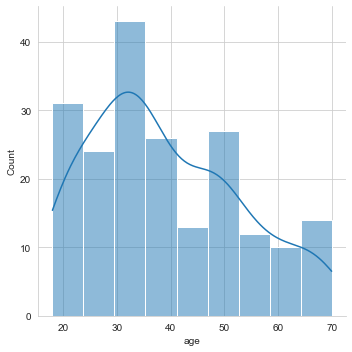

In [58]:
sns.displot(x='age',data=df,kde=True)
plt.show()

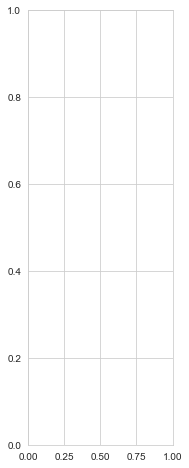

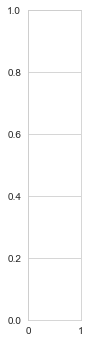

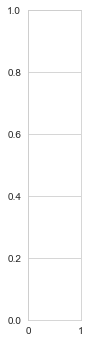

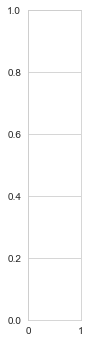

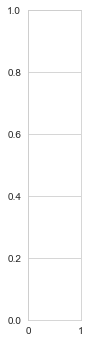

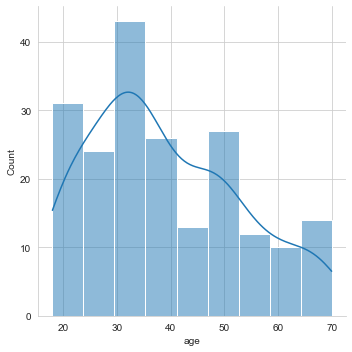

In [219]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
for i,col in enumerate(df.columns[:-1]):
    plt.subplot(1,5,i+1)
    sns.displot(x='age',data=df,kde=True)
    

plt.show()

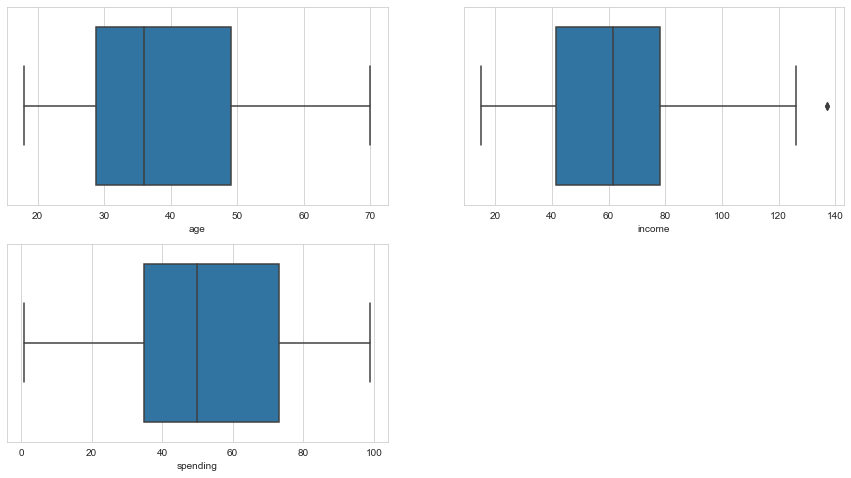

In [57]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
for i,col in enumerate(df.columns[:-1]):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=col,data=df)
    

plt.show()

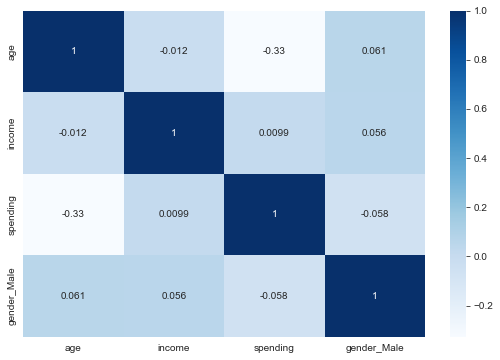

In [73]:
plt.figure(figsize=(9,6))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

In [65]:
df.corr()

,age,income,spending,gender_Male
age,1.000000,-0.012398,-0.327227,0.060867
income,-0.012398,1.000000,0.009903,0.056410
spending,-0.327227,0.009903,1.000000,-0.058109
gender_Male,0.060867,0.056410,-0.058109,1.000000


In [74]:
scaler = StandardScaler()

In [77]:
X = df.values

In [80]:
X_scale = scaler.fit_transform(X)

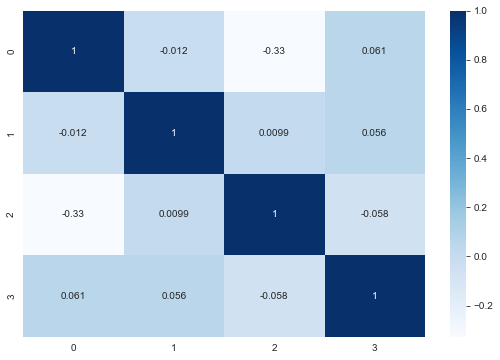

In [83]:
plt.figure(figsize=(9,6))
sns.heatmap(pd.DataFrame(X_scale).corr(),annot=True,cmap='Blues')
plt.show()

In [102]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    #k-means++ is an algorithm for choosing the initial values (or "seeds") for the k-means clustering algorithm.
    kmeans.fit(X_scale)
    wcss.append(kmeans.inertia_)

In [103]:
wcss

[800.0000000000003,
 588.8026767824932,
 476.78755441351575,
 386.7147857740689,
 325.10998348953416,
 275.8588431130497,
 236.20494707086885,
 199.7166255966768,
 174.19309570857695,
 152.086762987107]

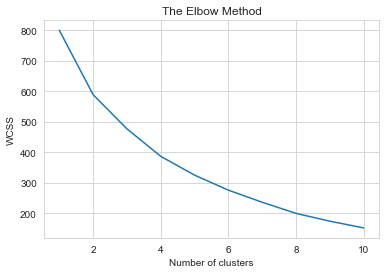

In [104]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [199]:
kmeans = KMeans(n_clusters = 5, random_state = 42)

In [200]:
cluster = kmeans.fit_predict(X_scale)

In [201]:
df['cluster'] = cluster

In [202]:
df.head()

,age,income,spending,gender_Male,cluster,db_result
0,19,15,39,1,1,-1
1,21,15,81,1,1,0
2,20,16,6,0,2,-1
3,23,16,77,0,0,1
4,31,17,40,0,2,1


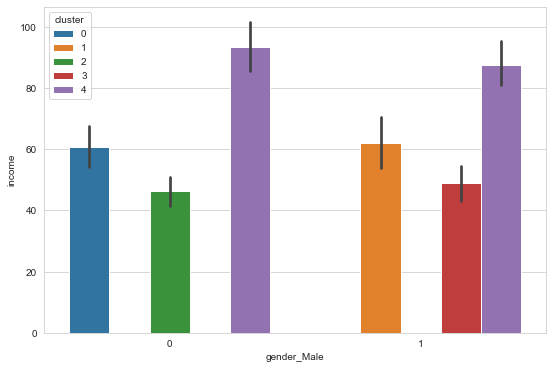

In [203]:
sns.barplot(x='gender_Male',y='income',data=df,hue='cluster')
plt.show()

In [204]:
sns.boxplot(x=,y='age',data=df,hue='cluster')
plt.show()

SyntaxError: invalid syntax (Temp/ipykernel_19836/1072115458.py, line 1)

In [ ]:
df.gender_Male.value_counts(normalize=True)

In [205]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='income',y='age',data=df,hue='cluster',palette=['black','blue','red','green'])
plt.show()

ValueError: The palette list has the wrong number of colors.

<Figure size 864x576 with 0 Axes>

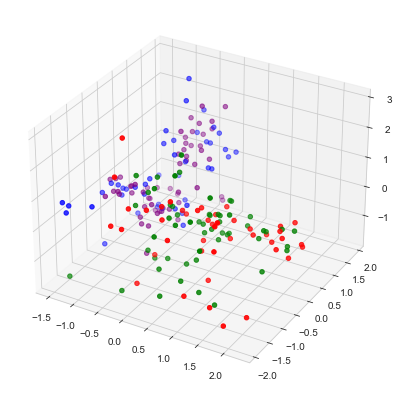

In [206]:

import matplotlib as mpl 

from mpl_toolkits.mplot3d import Axes3D


# from sklearn.datasets import make_blobs




mpl.rcParams["figure.figsize"] = (9,6)



# X = iris.data #clustering is unsupervised learning hence we load only X(i.e.iris.data) and not Y(i.e. iris.target)
# # Converting the data into dataframe
# feature_names = iris.feature_names
# iris_dataframe = pd.DataFrame(X, columns=feature_names)
# iris_dataframe.head(10)

# Fitting the model with a dummy model, with 3 clusters (we already know there are 3 classes in the Iris dataset)
k_means = KMeans(n_clusters=4)
k_means.fit(X_scale)

# Plotting a 3d plot using matplotlib to visualize the data points
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

# Setting the colors to match cluster results
colors = ['red' if label == 0 else 'purple' if label==1 else 'green' if label==2  else 'blue' for label in k_means.labels_]

ax.scatter(X_scale[:,0], X_scale[:,2], X_scale[:,1], c=colors)
plt.show()

## DBSCAN

In [207]:
clustering = DBSCAN(eps=1.03, min_samples=2).fit(X_scale)

In [208]:
dbscan_result = clustering.fit_predict(X_scale)

In [209]:
df['db_result'] = dbscan_result

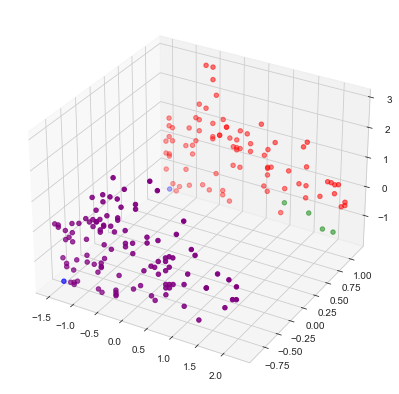

In [210]:

import matplotlib as mpl 

from mpl_toolkits.mplot3d import Axes3D


# from sklearn.datasets import make_blobs




mpl.rcParams["figure.figsize"] = (9,6)



# X = iris.data #clustering is unsupervised learning hence we load only X(i.e.iris.data) and not Y(i.e. iris.target)
# # Converting the data into dataframe
# feature_names = iris.feature_names
# iris_dataframe = pd.DataFrame(X, columns=feature_names)
# iris_dataframe.head(10)

# # Fitting the model with a dummy model, with 3 clusters (we already know there are 3 classes in the Iris dataset)
# k_means = KMeans(n_clusters=4)
# k_means.fit(X_scale)

# Plotting a 3d plot using matplotlib to visualize the data points
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

# Setting the colors to match cluster results
colors = ['red' if label == 0 else 'purple' if label==1 else 'green' if label==2  else 'blue' for label in clustering.labels_]

ax.scatter(X_scale[:,0], X_scale[:,-1], X_scale[:,1], c=colors)
plt.show()

In [211]:
clustering.labels_

array([-1,  0, -1,  1,  1,  1,  1,  1,  2,  1,  2,  1,  1,  1,  0,  0,  1,
        0,  0,  1,  0,  0,  1,  0,  1,  0,  1,  0,  1,  1,  2,  1,  2,  0,
        1,  1,  1,  1,  1,  1,  1,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  0,  0,  1,  1,  0,  0,  1,  1,
        0,  1,  0,  1,  1,  1,  0,  0,  1,  0,  1,  1,  0,  0,  0,  1,  1,
        0,  1,  1,  1,  1,  1,  0,  0,  1,  1,  0,  1,  1,  0,  0,  1,  1,
        0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  1,  1,  1,  1,  1,
        1,  0,  1,  1,  0,  1,  1,  0,  0,  0,  0,  0,  0,  1,  1,  0,  1,
        1,  0,  0,  1,  1,  0,  1,  1,  0,  0,  0,  1,  1,  0,  0,  0,  1,
        1,  1,  1,  0,  1,  0,  1,  1,  1,  0,  1,  0,  1,  0,  1,  1,  0,
        0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  1,  1,  0,  1,
        0,  1,  1,  1,  1,  0,  1,  1,  1,  1,  0,  0,  0], dtype=int64)

In [212]:
np.unique(clustering.labels_)

array([-1,  0,  1,  2], dtype=int64)

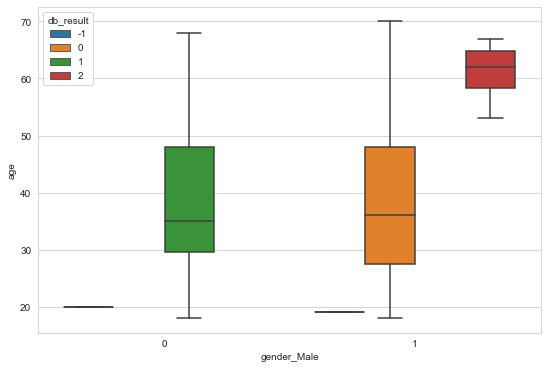

In [213]:
sns.boxplot(x='gender_Male',y='age',data=df,hue='db_result')
plt.show()

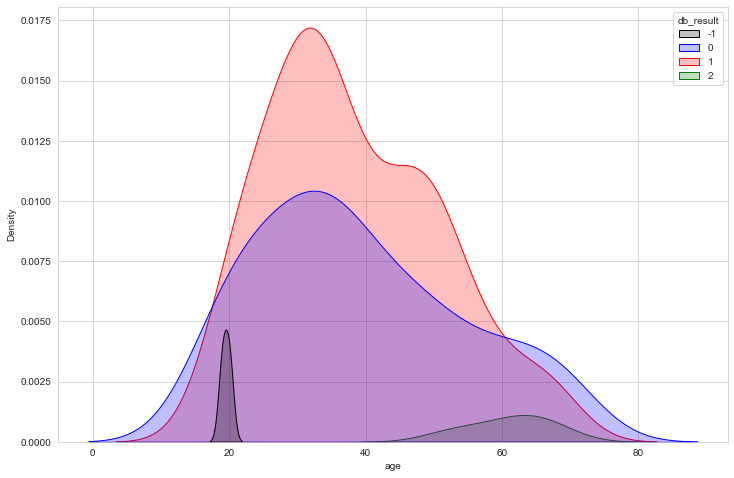

In [214]:
plt.figure(figsize=(12,8))
sns.kdeplot(x='age',data=df,hue='db_result',palette=['black','blue','red','green'],shade=True)
plt.show()

In [215]:
# plt.figure(figsize=(18,7))
# plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
# plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
# plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
# plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
# plt.title('Clusters of customers')
# plt.xlabel('Annual Income (k$)')
# plt.ylabel('Spending Score (1-100)')
# plt.legend()
# plt.show()

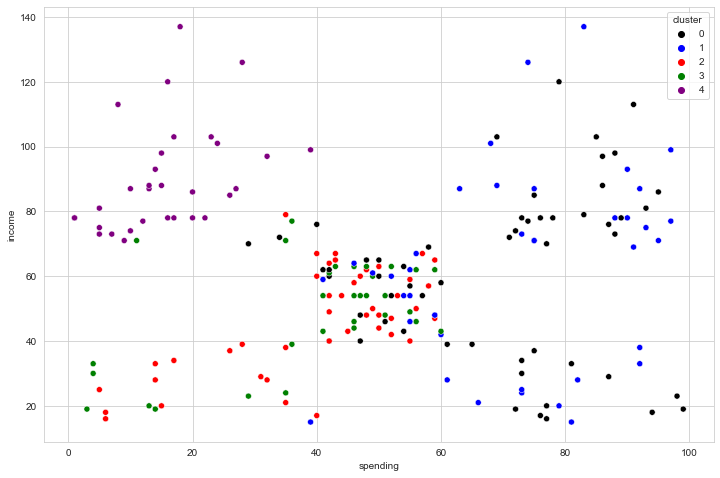

In [217]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='spending',y='income',data=df,hue='cluster',palette=['black','blue','red','green','purple'])
plt.show()